In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
#data = pd.read_csv("Dataset/final_df.csv")
data = walmart_holiday
#total_percent = pd.read_csv("Dataset/total_percent.csv")
total_percent = walmart_ttl
#holi_sum = pd.read_csv("Dataset/summary_holiday.csv")
holi_sum = holiday_summary
#unrate_ave = pd.read_csv("Dataset/rate_avg_holiday.csv")
unrate_ave = rate_holiday
#temp_ave = pd.read_csv("Dataset/temp_avg_is.csv")
temp_ave = temp_is
#unrate_avg = pd.read_csv("Dataset/rate_avg.csv")
unrate_avg = rate
#temp_total = pd.read_csv("Dataset/temp_ttl.csv")
temp_total = temp_ttl
#rate_total = pd.read_csv("Dataset/rate_ttl.csv")
rate_total = rate_ttl
holi_sum["Weekly_Sales"] = holi_sum["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)
unrate_ave["Weekly_Sales"] = unrate_ave["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)
temp_ave["Weekly_Sales"] = temp_ave["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)
unrate_avg["Weekly_Sales"] = unrate_avg["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)
temp_total["Weekly_Sales"] = temp_total["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)
rate_total["Weekly_Sales"] = rate_total["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)

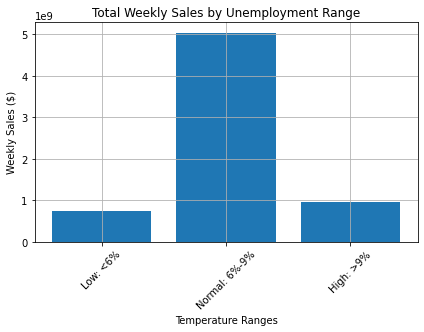

In [322]:
#BAR GRAPH of TOTAL WEEKLY SALES by UNEMPLOYMENT RANGE
total_sales = rate_total["Weekly_Sales"]
rate_categories = rate_total["Unemployment Category"]
plt.bar(rate_categories, total_sales)
plt.title("Total Weekly Sales by Unemployment Range")
plt.xlabel("Temperature Ranges")
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig("Figures/fig1.png")
plt.grid()
plt.show()

(-1.1162330040279258,
 1.1007730075941589,
 -1.1141496487163538,
 1.1161523886219777)

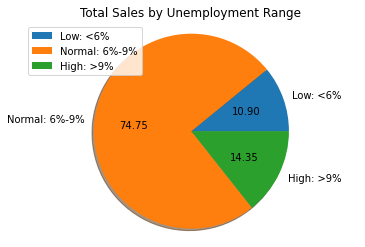

In [323]:
#PIE CHART TOTAL SALES BY UNEMPLOYMENT CATEGORY
total_sales = rate_total["Weekly_Sales"]
rate_categories = rate_total["Unemployment Category"]
explode = (0,1)
plt.title("Total Sales by Unemployment Range")
plt.pie(total_sales, labels = rate_categories, shadow = True,autopct='%.2f')
plt.legend()
plt.axis("equal")
plt.savefig("Figures/fig2.png")

(-1.11262949672827,
 1.1006014409962719,
 -1.1121720788291871,
 1.1277923719221394)

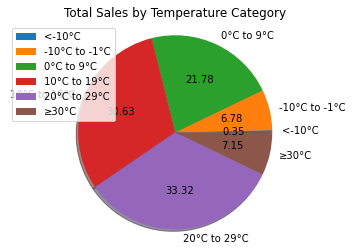

In [324]:
#PIE CHART OF TOTAL SALES BY TEMP CATEGORY
total_sales = temp_total["Weekly_Sales"]
temp_categories = temp_total["Temp Category"]
explode = (0,1)
plt.title("Total Sales by Temperature Category")
plt.pie(total_sales, labels = temp_categories, shadow = True,autopct='%.2f')
plt.legend()
plt.axis("equal")
plt.savefig("Figures/fig3.png")

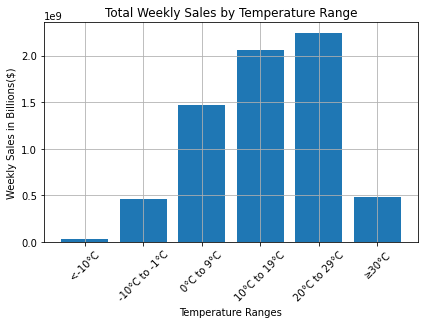

In [325]:
#BAR GRAPH TOTAL WEEKLY SALES BY TEMPERATURE CATEGORY
total_sales = temp_total["Weekly_Sales"]
temp_categories = temp_total["Temp Category"]
plt.bar(temp_categories, total_sales)
plt.title("Total Weekly Sales by Temperature Range")
plt.xlabel("Temperature Ranges")
plt.ylabel("Weekly Sales in Billions($)")
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid()
plt.savefig("Figures/fig4.png")
plt.show()

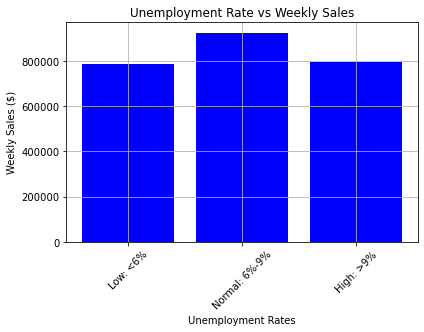

In [326]:
#BAR GRAPH OF AVERAGE WEEKLY SALES BY EMPLOYMENT RATE
weekly_sales = unrate_avg["Weekly_Sales"]
unemp_categories = unrate_avg["Unemployment Category"]
plt.title("Unemployment Rate vs Weekly Sales")
plt.bar(unemp_categories, weekly_sales, color="blue")
plt.xlabel("Unemployment Rates")
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid()
plt.savefig("Figures/fig5.png")
plt.show()

In [328]:
regular_sales_total = data.loc[data["Is Holiday"]=="No Holiday"]["Weekly_Sales"].sum()
holiday_sales_total = data.loc[data["Is Holiday"]=="Holiday"]["Weekly_Sales"].sum()
weekly_sales = data["Weekly_Sales"]
ave_temperature = data["Temperature"]
ave_fuel_price = data["Fuel_Price"]
un_rate = data["Unemployment"]
cpi = data["CPI"]
store_number = data["Store"]


(-1.1076047862999432,
 1.1003621571621467,
 -1.1018516780641336,
 1.107699260694615)

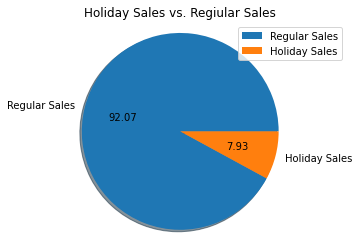

In [329]:
#PIE CHART TOTAL HOLIDAY AND NON HOLIDAY SALES
regular_sales_total
holiday_sales_total

types = ["Regular Sales","Holiday Sales"]
sales = [regular_sales_total, holiday_sales_total]
explode = (0,1)
plt.title("Holiday Sales vs. Regiular Sales")
plt.pie(sales, labels = types, shadow = True,autopct='%.2f')
plt.legend()
plt.axis("equal")
plt.savefig("Figures/fig6.png")

<Figure size 14400x7200 with 0 Axes>

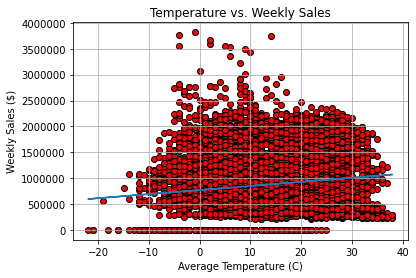

<Figure size 14400x7200 with 0 Axes>

In [330]:
#SCATTER PLOT BY AVERAGE TEMPERATURE
ave_temperature
weekly_sales

plt.title("Temperature vs. Weekly Sales")
plt.xlabel("Average Temperature (C)")
plt.ylabel("Weekly Sales ($)")
#plt.xlim(-50,50)
#plt.ylim(0,100000)
plt.grid()
plt.scatter(ave_temperature, weekly_sales, marker="o", color = "red",edgecolors="black")
plt.ticklabel_format(style='plain')
slope, intercept, r_value, p_value, std_err = st.linregress(ave_temperature, weekly_sales)
best_fit = slope*ave_temperature+intercept
plt.plot(ave_temperature,best_fit)
plt.figure(figsize=(200,100)) 
plt.savefig("Figures/fig7.png")

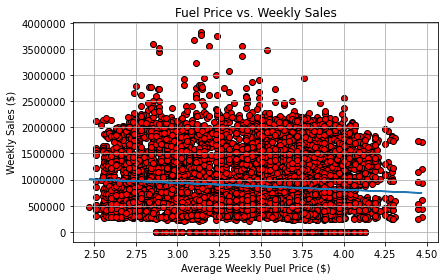

In [331]:
#SCATTER by FUEL PRICE
ave_fuel_price
weekly_sales

plt.title("Fuel Price vs. Weekly Sales")
plt.xlabel("Average Weekly Puel Price ($)")
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.grid()
plt.scatter(ave_fuel_price, weekly_sales, marker="o", color="red",edgecolors="black")
plt.ticklabel_format(style='plain')
slope, intercept, r_value, p_value, std_err = st.linregress(ave_fuel_price, weekly_sales)
best_fit = slope*ave_fuel_price+intercept
plt.plot(ave_fuel_price,best_fit)
plt.savefig("Figures/fig8.png")

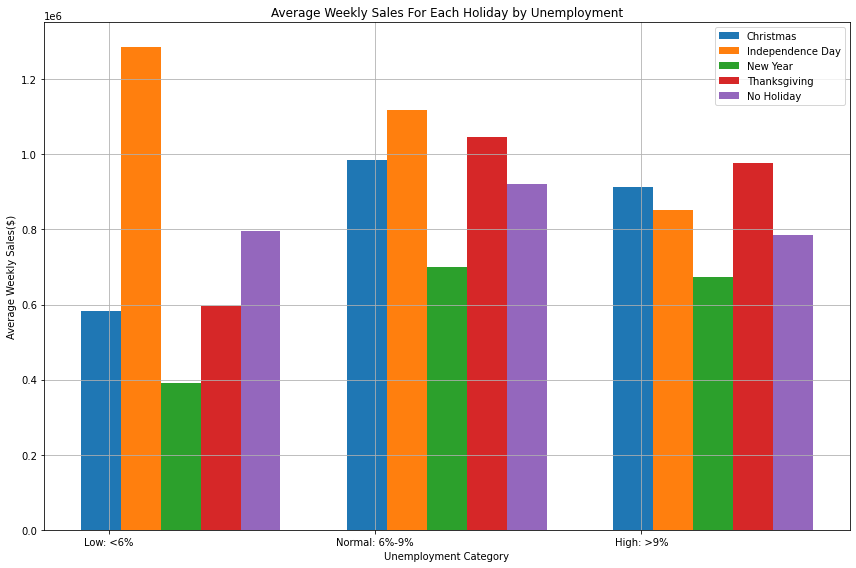

In [332]:
#AVERAGE WEEKLY SALES FOR EACH HOLIDAY BY UNEMPLOYMENT CATEGORY
bar_width = 0.15
fig, ax = plt.subplots(figsize=(12, 8))
r1 = np.arange(len(unrate_ave["Unemployment Category"].unique()))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
b1 = ax.bar(r1, unrate_ave.loc[unrate_ave["Holiday Name"] == 'Christmas', 'Weekly_Sales'],width=bar_width, label="Christmas")
b2 = ax.bar(r2, unrate_ave.loc[unrate_ave["Holiday Name"] == 'Independence Day', 'Weekly_Sales'],width=bar_width, label="Independence Day")
b3 = ax.bar(r3, unrate_ave.loc[unrate_ave["Holiday Name"] == 'New Year', 'Weekly_Sales'],width=bar_width, label = "New Year")
b4 = ax.bar(r4, unrate_ave.loc[unrate_ave["Holiday Name"] == 'Thanksgiving', 'Weekly_Sales'],width=bar_width, label = "Thanksgiving")
b3 = ax.bar(r5, unrate_ave.loc[unrate_ave["Holiday Name"] == 'No Holiday', 'Weekly_Sales'],width=bar_width, label = "No Holiday")
ax.set_xticks(x + bar_width / 5)
ax.set_xticklabels(unrate_ave["Unemployment Category"])
plt.title("Average Weekly Sales For Each Holiday by Unemployment")
plt.ylabel("Average Weekly Sales($)")
plt.xlabel("Unemployment Category")
ax.legend()
plt.tight_layout()
plt.savefig("Figures/fig9.png")
plt.grid()

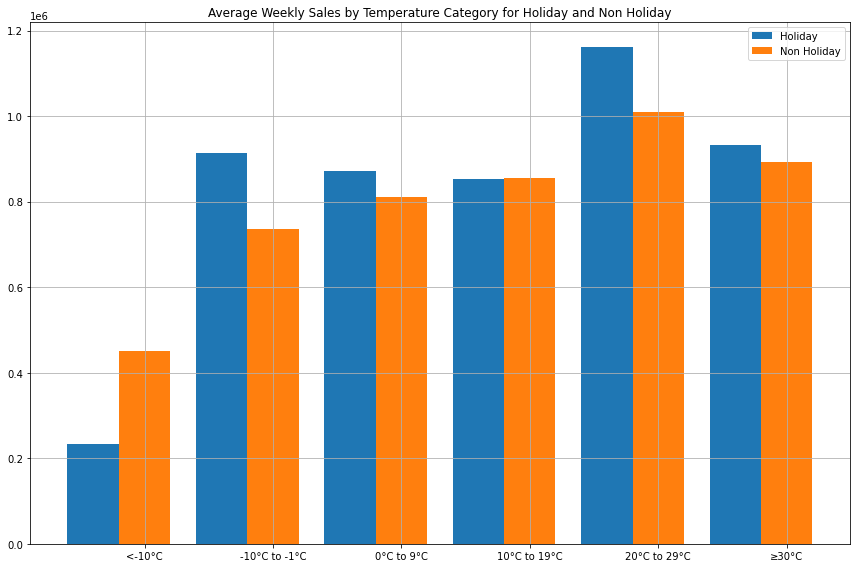

In [333]:
bar_width = 0.4
fig, ax = plt.subplots(figsize=(12, 8))
r1 = np.arange(len(temp_ave["Temp Category"].unique()))
r2 = [x + bar_width for x in r1]
b1 = ax.bar(r1, temp_ave.loc[temp_ave["Is Holiday"] == 'Holiday', 'Weekly_Sales'],width=bar_width, label="Holiday")
b2 = ax.bar(r2, temp_ave.loc[temp_ave["Is Holiday"] == 'No Holiday', 'Weekly_Sales'],width=bar_width, label="Non Holiday")
ax.set_xticks(x + bar_width/2)
plt.xticks([r + bar_width for r in range(len(temp_ave["Temp Category"].unique()))], ["<-10°C","-10°C to -1°C","0°C to 9°C","10°C to 19°C","20°C to 29°C","≥30°C"])
#ax.set_xticklabels(["<-10°C","-10°C to -1°C","0°C to 9°C","10°C to 19°C","20°C to 29°C","≥30°C"])
plt.title("Average Weekly Sales by Temperature Category for Holiday and Non Holiday")
ax.legend()
plt.tight_layout()
plt.savefig("Figures/fig10.png")
plt.grid()

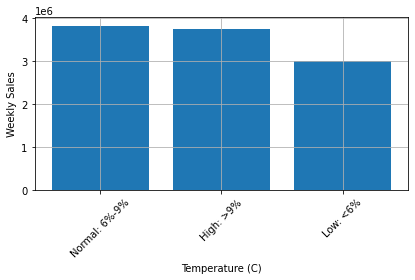

In [334]:
#TOTAL WEKLY SALES BY UNEMPLOYMENT CATEGORIES
bars = data.loc[data["Is Holiday"]=="Holiday"]
plt.bar(bars["Unemployment Category"],bars["Weekly_Sales"])
plt.xlabel("Temperature (C)")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.grid()
plt.savefig("Figures/fig11.png")
plt.tight_layout()

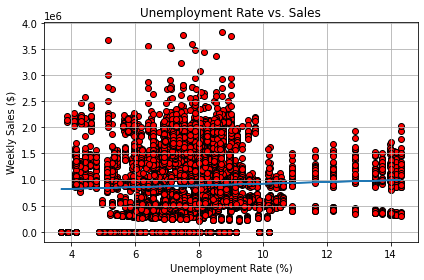

In [335]:
#SCATTER UNEMPLOYMENT RATE V SALES
plt.title("Unemployment Rate vs. Sales")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Weekly Sales ($)")
#plt.xlim(4,15)
#plt.ylim(0,5000000)
plt.scatter(un_rate, weekly_sales, marker="o", color="red", edgecolor="black")
slope, intercept, r_value, p_value, std_err = st.linregress(un_rate, weekly_sales)
best_fit = slope*un_rate+intercept
plt.plot(un_rate,best_fit)
plt.grid()
plt.savefig("Figures/fig12.png")
plt.tight_layout()

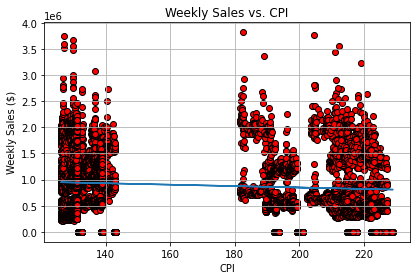

In [336]:
#WEEKLY SALES BY CPI
weekly_sales
cpi
plt.title("Weekly Sales vs. CPI")
plt.ylabel("Weekly Sales ($)")
plt.xlabel("CPI")
plt.tight_layout()
plt.scatter(cpi,weekly_sales,marker="o", color="red",edgecolor="black")
slope, intercept, r_value, p_value, std_err = st.linregress(cpi, weekly_sales)
best_fit = slope*cpi+intercept
plt.plot(cpi,best_fit)
plt.savefig("Figures/fig13.png")
plt.grid()


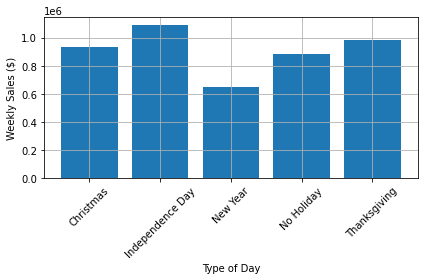

In [337]:
#AVERAGE WEEKLY SALES BY HOLIDAY
plt.bar(holi_sum["Holiday Name"],holi_sum["Weekly_Sales"])
plt.xlabel("Type of Day")
plt.ylabel("Weekly Sales ($)")
plt.xticks(rotation=45)
plt.savefig("Figures/fig14.png")
plt.grid()
plt.tight_layout()

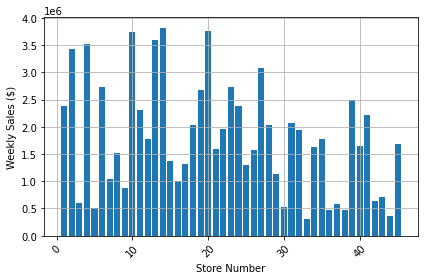

In [338]:
#holiday sales by store number

bars = data.loc[data["Is Holiday"]=="Holiday"]
plt.bar(bars["Store"],bars["Weekly_Sales"])
plt.xlabel("Store Number")
plt.ylabel("Weekly Sales ($)")
plt.xticks(rotation=45)
plt.grid()
plt.savefig("Figures/fig15.png")
plt.tight_layout()